In [1]:
# Import standard libraries needed for data exploration 
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import OrderedDict

pd.options.display.max_rows = 100

## Load data

In [101]:
data = pd.read_csv('./data/data_2015_2018.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## Exploring relationships of variables

### Loan Status

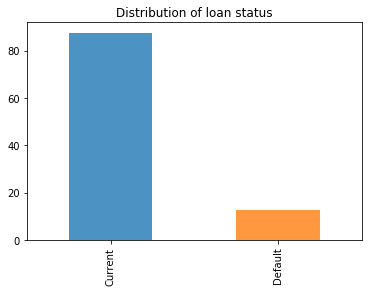

In [74]:
# Look in the full data
ls_count = data.groupby('loan_status')['loan_status'].count()
ls_count = 100.0*ls_count/ls_count.sum()
ls_count = ls_count.rename(columns={'loan_status': 'counts'})
ls_count.index = ['Current','Default']
ls_count.plot(kind = 'bar', alpha = 0.8)
plt.title('Distribution of loan status');

The dataset is highly imbalanced with 87% of loans in the lending club database either paid or in good standing.

### Explore correlations with loan status

In [102]:
train = train.drop(labels = ['year'], axis = 1)

In [103]:
correlations = train.corr()
# Pick the top 10 variables
indx_corr_ls = list(abs(correlations['loan_status']).sort_values(ascending = False)[0:10].index)
corr_ls = train[indx_corr_ls].corr()

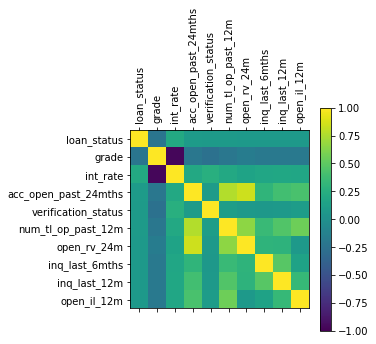

In [104]:
plt.matshow(corr_ls, vmin = -1, vmax = 1);
plt.colorbar();
plt.xticks(range(len(indx_corr_ls)), indx_corr_ls, rotation = 'vertical');
plt.yticks(range(len(indx_corr_ls)), indx_corr_ls, rotation = 'horizontal');

In [105]:
# Print correlation values with loan status
corr_ls['loan_status']

loan_status             1.000000
grade                  -0.219468
int_rate                0.212623
acc_open_past_24mths    0.099571
verification_status     0.092836
num_tl_op_past_12m      0.089559
open_rv_24m             0.083187
inq_last_6mths          0.079071
inq_last_12m            0.077115
open_il_12m             0.076026
Name: loan_status, dtype: float64

The loan status is correlated with metrics related to finacial health of the user like number of accounts, number of credit inquiries, verification status and the grade / interest rate of loan. 

### Relation of loan status with selected categorical features

In [125]:
categorical_feature = ['term', 'grade', 'sub_grade',
                      'emp_length','home_ownership','verification_status']

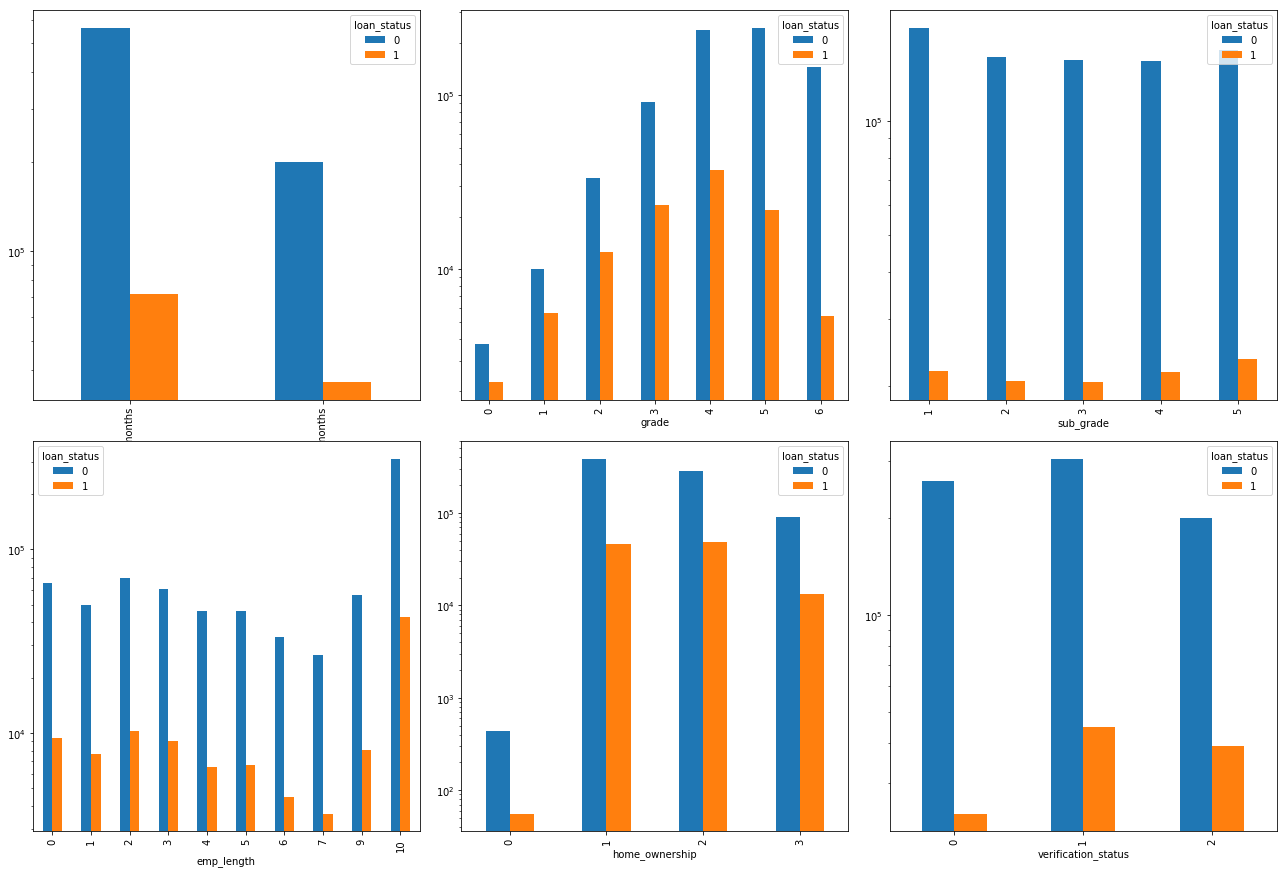

In [130]:
# For scaling we set the y to be log scale
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.tight_layout(h_pad=2)
for i in range(len(categorical_feature)):
    name = categorical_feature[i]
    train.groupby('loan_status')[name].value_counts().unstack('loan_status').plot(kind='bar',ax=ax[i//3][i%3])
    ax[i//3][i%3].set_yscale('log')
plt.show()

### Relation of loan status with numerical features

In [145]:
numerical_feature = ['loan_amnt', 'int_rate','installment', 'annual_inc',
                    'dti', 'delinq_2yrs', 'credit_age',
                    'acc_open_past_24mths','num_tl_op_past_12m','open_rv_24m',
                    'inq_last_6mths','inq_last_12m','open_il_12m ']

KeyError: 'open_il_12m '

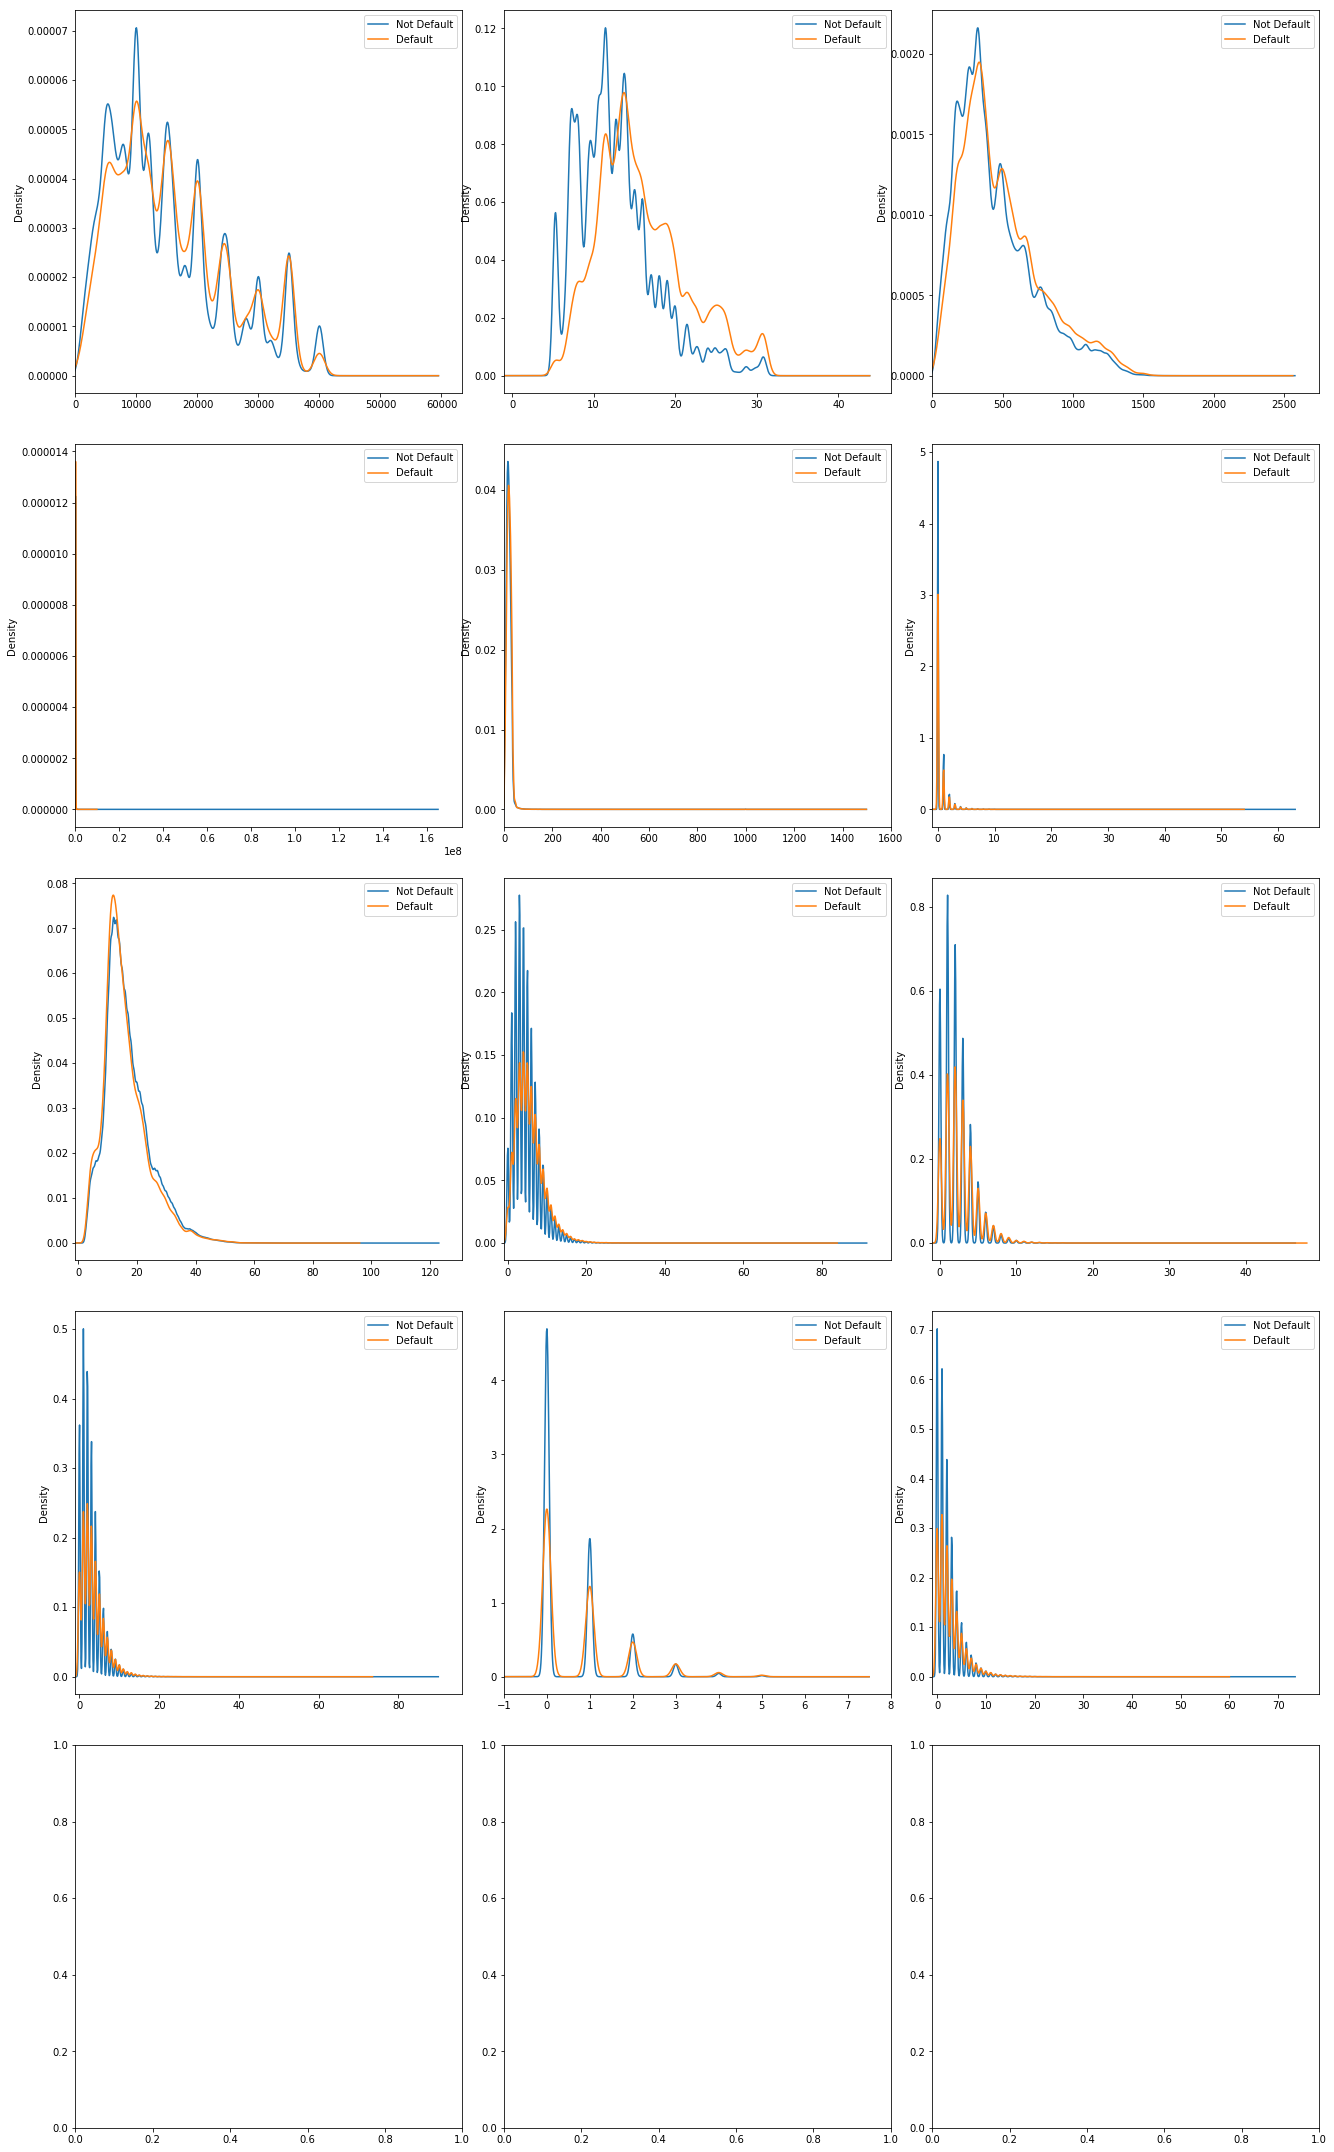

In [146]:
# Histogram/Density plot of numerical values
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(18, 30))
plt.tight_layout(h_pad=3)
for i in range(len(numerical_feature)):
    name = numerical_feature[i]
    train[train['loan_status'] == 0][name].plot.density(ax=ax[i//3][i%3],label = 'Not Default', xlim=-1)
    train[train['loan_status'] == 1][name].plot.density(ax=ax[i//3][i%3],label = 'Default', xlim=-1)
    ax[i//3][i%3].legend()
plt.show()